In [ ]:
#Stap 4: Data voorbereiden + model trainen (Logistic Regression & XGBoost)
#We starten nu met het bouwen van je machine learning model in de notebook:
#    Wat je nu gaat doen:
#
#    Features & target splitsen
#
#    Train/test verdeling maken
#
#    Data schalen (optioneel maar aanbevolen)
#
#    Model trainen: Logistic Regression & XGBoost
#
#    Model evalueren: accuracy, recall, precision, F1, ROC/AUC
#
#    Model opslaan (.pkl)

In [3]:
# ------------------------------
# 📚 IMPORTS – uitleggend
# ------------------------------

import pandas as pd  
# Pandas is de standaardtool om CSV-bestanden in te laden en met tabellen (DataFrames) te werken

from sklearn.model_selection import train_test_split  
# Hiermee splits je je dataset in een trainingsset en een testset om je model eerlijk te kunnen evalueren

from sklearn.preprocessing import StandardScaler  
# Deze zorgt ervoor dat alle numerieke waarden op dezelfde schaal zitten (belangrijk voor sommige modellen zoals LogReg)

from sklearn.linear_model import LogisticRegression  
# Dit is een eenvoudig maar krachtig model dat goed werkt bij binaire classificatieproblemen zoals fraude ja/nee

from xgboost import XGBClassifier  
# XGBoost is een geavanceerd, krachtig model dat goed werkt op tabulaire data en vaak de beste prestaties geeft

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay  
# Dit zijn evaluatiefuncties om te meten hoe goed je model presteert (bijv. precision, recall, F1-score, ROC)

import matplotlib.pyplot as plt  
# Matplotlib is een veelgebruikte Python-bibliotheek om grafieken en figuren te maken

import joblib  
# Joblib laat je toe om je getrainde model op te slaan als bestand zodat je het later opnieuw kunt laden


In [5]:
# ------------------------------
#  STAP 1 – Laad de dataset in
# ------------------------------

# We laden de subset die je eerder hebt opgeslagen (alle fraude + 5000 normale transacties)
df = pd.read_csv(r"C:\Users\DASEE\Downloads\creditcard_subset.csv")


In [6]:
# ------------------------------
#  STAP 2 – Maak X en y (features en labels)
# ------------------------------

# Verwijder de kolom 'Class' uit de data en bewaar die apart als doelvariabele
X = df.drop("Class", axis=1)  # Alle invoervariabelen
y = df["Class"]               # De doelvariabele: 1 = fraude, 0 = geen fraude

In [7]:
# ------------------------------
#  STAP 3 – Train/test verdeling
# ------------------------------

# We splitsen de data in 80% training en 20% test, met gelijke verdeling van klassen (stratify=y)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


In [8]:
# ------------------------------
# 📏 STAP 4 – Schalen van de data (voor LogReg)
# ------------------------------

# Logistic Regression werkt beter als alle inputvariabelen op dezelfde schaal liggen (mean = 0, std = 1)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit op training, transformeer training
X_test_scaled = scaler.transform(X_test)        # Transformeer testdata met dezelfde schaal


### 🧠 Modeltraining uitgelegd

In dit deel trainen we twee verschillende modellen om frauduleuze transacties te detecteren: **Logistic Regression** en **XGBoost**.

#### 🎯 Wat is ons doel?

We willen een machine learning model bouwen dat leert of een transactie verdacht is (Class = 1) of normaal (Class = 0), op basis van de andere kenmerken (V1 t/m V28, Time, en Amount).

---

#### 🤖 Model 1: Logistic Regression

Logistic Regression is een klassiek model dat goed werkt bij binaire classificatie. Het berekent een kans (tussen 0 en 1) dat een transactie fraude is. Als deze kans boven een drempel ligt (meestal 0.5), dan voorspelt het 'fraude'.

Het voordeel van Logistic Regression is dat het eenvoudig te interpreteren is en snel werkt. Omdat dit model gevoelig is voor schaalverschillen tussen variabelen, schalen we de data vooraf met **StandardScaler**.

---

#### ⚡ Model 2: XGBoost (Extreme Gradient Boosting)

XGBoost is een krachtig en veelgebruikt model dat gebruikmaakt van beslisbomen. Het bouwt veel kleine bomen na elkaar, waarbij elke nieuwe boom leert van de fouten van de vorige. Dit heet **"boosting"**.

XGBoost is robuust, goed in het omgaan met ongebalanceerde data en haalt vaak zeer hoge prestaties, zeker op tabulaire datasets zoals deze. In tegenstelling tot Logistic Regression hoeft XGBoost de data **niet geschaald** te hebben.

---

#### 🧪 Train-test split

Om te testen of onze modellen goed generaliseren, splitsen we de data in een **trainingsset (80%)** en een **testset (20%)**, waarbij we rekening houden met de zeldzame klasse 'fraude' via `stratify=y`.

---

#### 📊 Evaluatie

Na het trainen gebruiken we verschillende metrics om de prestaties te meten:

- **Precision**: Hoeveel van de als fraude voorspelde transacties waren echt fraude?
- **Recall**: Hoeveel van de echte fraudegevallen hebben we gevonden?
- **F1-score**: Een balans tussen precision en recall
- **ROC-curve**: Laat zien hoe goed het model klassen kan scheiden

Tot slot slaan we het XGBoost-model op als `.pkl`-bestand met `joblib`, zodat we het later kunnen gebruiken in bijvoorbeeld een webapp.



In [9]:
# ------------------------------
# 🤖 STAP 5A – Train Logistic Regression model
# ------------------------------

logreg = LogisticRegression(max_iter=1000)  # max_iter verhogen om convergentie te garanderen
logreg.fit(X_train_scaled, y_train)         # Model trainen op geschaalde data

LogisticRegression(max_iter=1000)

In [10]:
# ------------------------------
# 🤖 STAP 5B – Train XGBoost model
# ------------------------------

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')  # Geen waarschuwingen + correcte evaluatie
xgb.fit(X_train, y_train)  # XGBoost kan zelf omgaan met ongeschaalde data


c:\Program Files\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:21:21] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [11]:
# ------------------------------
# 📊 STAP 6 – Evaluatie van beide modellen
# ------------------------------

print("=== Logistic Regression ===")
y_pred_log = logreg.predict(X_test_scaled)
print(classification_report(y_test, y_pred_log))  # Toon precision, recall, f1-score

print("=== XGBoost Classifier ===")
y_pred_xgb = xgb.predict(X_test)
print(classification_report(y_test, y_pred_xgb))

=== Logistic Regression ===
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1001
           1       0.95      0.85      0.90        98

    accuracy                           0.98      1099
   macro avg       0.97      0.92      0.94      1099
weighted avg       0.98      0.98      0.98      1099

=== XGBoost Classifier ===
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1001
           1       0.96      0.87      0.91        98

    accuracy                           0.98      1099
   macro avg       0.97      0.93      0.95      1099
weighted avg       0.98      0.98      0.98      1099



### 📊 Uitleg evaluatie: Logistic Regression & XGBoost

Na het trainen van de modellen bekijken we hun prestaties met behulp van het `classification_report`, dat de volgende meetwaarden toont per klasse:

---

#### ✅ Klassen:
- **0** = normale transactie
- **1** = fraude (de moeilijkste en belangrijkste om te vinden)

---

#### 📈 Betekenis van de kolommen:

| Term           | Uitleg                                                                 |
|----------------|------------------------------------------------------------------------|
| **Precision**  | Hoeveel van de voorspelde fraudegevallen waren ook echt fraude?       |
| **Recall**     | Hoeveel van de échte fraudegevallen zijn correct herkend?             |
| **F1-score**   | Het gemiddelde van precision en recall — hoe goed is de balans?       |
| **Support**    | Het aantal gevallen van die klasse in de testset                      |

---

### 🔍 Voorbeeld: Logistic Regression


### 🔍 Voorbeeld: Logistic Regression

          precision    recall  f1-score   support

       0       0.99      1.00      0.99      1001
       1       0.95      0.85      0.90        98



- Klasse **0 (normaal)**:
  - **Precision 0.99** → Bijna alle voorspellingen 'normaal' waren ook echt normaal
  - **Recall 1.00** → Alle echte normale transacties zijn correct als normaal voorspeld
  - **F1-score 0.99** → Balans tussen precision & recall is zeer hoog

- Klasse **1 (fraude)**:
  - **Precision 0.95** → 95% van de voorspellingen 'fraude' waren echt fraude
  - **Recall 0.85** → Van alle echte fraudegevallen hebben we er 85% gevonden
  - **F1-score 0.90** → Goede balans tussen precisie en volledigheid, maar iets lager dan bij klasse 0

---

### 🔍 Voorbeeld: XGBoost

       1       0.96      0.87      0.91        98



- Net als Logistic Regression, maar **iets beter bij klasse 1 (fraude)**:
  - **Precision 0.96** → Minder false positives
  - **Recall 0.87** → Meer fraudegevallen opgespoord dan bij Logistic Regression
  - **F1-score 0.91** → Beter algemeen evenwicht

---

### 📌 Totale metingen:
accuracy 0.98 1099
macro avg 0.97 0.92 0.94
weighted avg 0.98 0.98 0.98


- **Accuracy**: 98% van alle transacties zijn correct voorspeld (goed, maar pas op met ongebalanceerde data)
- **Macro avg**: Gemiddelde over beide klassen (even zwaar meegewogen)
- **Weighted avg**: Gemiddelde over beide klassen, maar rekening houdend met hoeveel gevallen van elke soort

---

### 🎯 Conclusie

Beide modellen presteren uitstekend, maar **XGBoost scoort net iets beter op het herkennen van fraudegevallen**, wat belangrijk is in dit soort toepassingen.

Je kunt XGBoost gebruiken als eindmodel voor een demo of Streamlit-app.




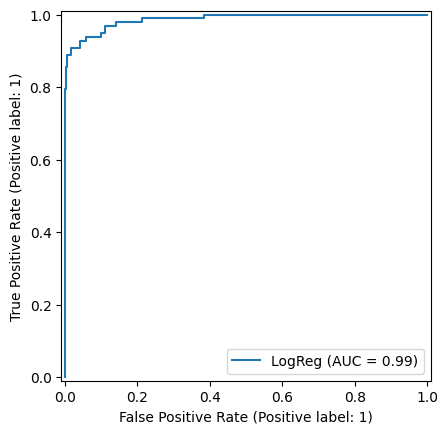

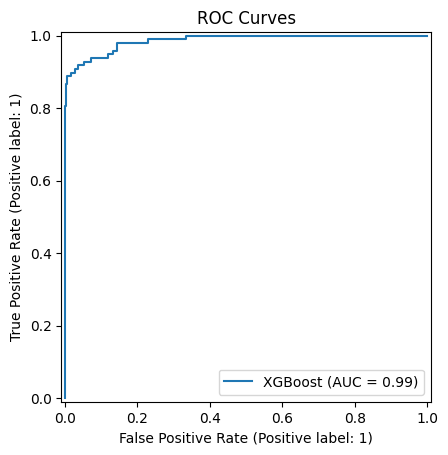

In [12]:
# ------------------------------
# 📈 ROC-curves plotten voor beide modellen
# ------------------------------

RocCurveDisplay.from_estimator(logreg, X_test_scaled, y_test, name="LogReg")
RocCurveDisplay.from_estimator(xgb, X_test, y_test, name="XGBoost")
plt.title("ROC Curves")
plt.show()

In [13]:

# ------------------------------
# 💾 STAP 7 – Model opslaan voor later gebruik
# ------------------------------

# We slaan het XGBoost-model op als .pkl bestand zodat we het kunnen gebruiken in een Streamlit app of later opnieuw laden
joblib.dump(xgb, "../models/fraud_model_xgb.pkl")
print("✅ XGBoost-model opgeslagen als: models/fraud_model_xgb.pkl")


✅ XGBoost-model opgeslagen als: models/fraud_model_xgb.pkl


# 📊 Model Evaluatie: Fraudedetectie

In deze sectie analyseren we hoe goed onze modellen (Logistic Regression & XGBoost) presteren bij het opsporen van frauduleuze transacties. We gebruiken het `classification_report` en de **ROC-curve** om dit te beoordelen.

---

## 📄 Begrippen uitgelegd

Het `classification_report` geeft per klasse de volgende meetwaarden:

| Term           | Uitleg                                                                 |
|----------------|------------------------------------------------------------------------|
| **Precision**  | Hoeveel van de voorspelde fraudegevallen waren ook echt fraude?       |
| **Recall**     | Hoeveel van de échte fraudegevallen zijn correct herkend?             |
| **F1-score**   | Het gemiddelde van precision en recall — hoe goed is de balans?       |
| **Support**    | Het aantal gevallen van die klasse in de testset                      |

We bekijken deze metrics voor beide klassen:
- **0 = normale transactie**
- **1 = fraude**

---

## 🔍 Evaluatie: Logistic Regression

       1       0.96      0.87      0.91        98


- Klasse **1 (fraude)**:
  - Precision 0.96: Nóg minder vals positieven dan LogReg
  - Recall 0.87: Meer fraudegevallen gevonden dan LogReg
  - F1-score 0.91: Sterk resultaat

**Conclusie**: XGBoost presteert iets beter bij het vinden van fraude — ideaal voor een praktijktoepassing.

---

## 📈 ROC-curve: wat betekent dat?

De **ROC-curve** (Receiver Operating Characteristic) toont hoe goed het model onderscheid maakt tussen fraude (1) en normaal (0), bij verschillende drempelwaarden.

- **True Positive Rate** (y-as) = Recall
- **False Positive Rate** (x-as) = foutalarm bij normale transacties

De **AUC-score (Area Under the Curve)** geeft één getal van 0 tot 1:
- **0.5 = gokken**
- **1.0 = perfect model**
- In praktijk: alles boven 0.90 = topmodel

> ➕ Je kunt meerdere modellen vergelijken op één ROC-plot om visueel te zien welk model beter onderscheid maakt.

---

## 💼 Hoe dit uitleggen in een sollicitatie of portfolio?

Tijdens een sollicitatie of in je GitHub README kun je dit benadrukken:

- "Ik heb zowel een interpreteerbaar model (Logistic Regression) als een geavanceerd model (XGBoost) getraind."
- "Ik heb de prestaties gemeten met relevante metrics zoals Precision, Recall en ROC-AUC."
- "Omdat fraude zeldzaam is, koos ik bewust voor Recall en F1-score boven Accuracy."
- "Ik heb het beste model opgeslagen en voorbereid voor gebruik in een demo-webapp met Streamlit."

> 🎯 Dit toont dat je niet alleen codeert, maar ook **snapt wat je doet** en **weloverwogen keuzes maakt** — iets waar werkgevers van houden.

---


